Could you provide an answer for the following questions:
- Which brewery produces the strongest beers by abv ?
- If you had to pick 3 beers to recommend to someone, how would you approach the problem ?
- What are the factors that impacts the quality of beer the most ?
- I enjoy a beer which aroma and appearance matches the beer style. What beer should I buy ?


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv('beer_reviews.csv')

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
df.isna().sum()

In [187]:
df.groupby(['brewery_name']).mean('beer_abv').sort_values(by=['beer_abv'], ascending=False).head(3)

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
brewery_name,,,,,,,,,
Schorschbräu,6513.0,1.219645e+09,3.411765,3.529412,3.558824,3.470588,3.514706,19.228824,34235.676471
Shoes Brewery,14060.0,1.220522e+09,3.000000,3.000000,3.750000,3.500000,3.250000,15.200000,32949.000000
Hurlimann Brewery,736.0,1.059959e+09,3.815789,4.342105,3.947368,4.131579,4.236842,13.396968,4341.631579


**1) Which brewery produces the strongest beers by abv ?**

-> Schorschbräu

In [ ]:
df_grouped = df.groupby(['beer_style','beer_name']).agg({'review_overall' : ['count','mean']}).sort_values(by=[('review_overall','mean'),('review_overall','count')], ascending=False)
df_filtered = df_grouped[df_grouped[('review_overall','count')] > 100]

In [ ]:
df_filtered

review_overall  \
                                                                                           count   
beer_style                     beer_name                                                           
American Double / Imperial IPA Citra DIPA                                                    252   
Lambic - Fruit                 Cantillon Blåbær Lambik                                       156   
American Double / Imperial IPA Heady Topper                                                  469   
American Wild Ale              Deviation - Bottleworks 9th Anniversary                       112   
Quadrupel (Quad)               Trappist Westvleteren 12                                     1272   
...                                                                                          ...   
Fruit / Vegetable Beer         Budweiser Chelada                                             138   
                               Wild Blue (Blueberry Lager)                                   482   
                               Bud Light Chelada                                             114   
Chile Beer                     Original C Cave Creek Chili Beer - Cerveza Con ...            132   
                               Crazy Ed's Cave Creek Chili Beer                              267   

                                                                                             
                                                                                       mean  
beer_style                     beer_name                                                     
American Double / Imperial IPA Citra DIPA                                          4.630952  
Lambic - Fruit                 Cantillon Blåbær Lambik                             4.628205  
American Double / Imperial IPA Heady Topper                                        4.625800  
American Wild Ale              Deviation - Bottleworks 9th Anniversary             4.620536  
Quadrupel (Quad)               Trappist Westvleteren 12                            4.617925  
...                                                                                     ...  
Fruit / Vegetable Beer         Budweiser Chelada                                   1.931159  
                               Wild Blue (Blueberry Lager)                         1.924274  
                               Bud Light Chelada                                   1.710526  
Chile Beer                     Original C Cave Creek Chili Beer - Cerveza Con ...  1.681818  
                               Crazy Ed's Cave Creek Chili Beer                    1.488764  

[3109 rows x 2 columns]

**2) If you had to pick 3 beers to recommend to someone, how would you approach the problem ?**

-> Since I don't know what type of beers the person is fond of, I would recommend **3 different types of beers with the highest average review_overall rate that have more than 100 reviews**, to be sure than enough people had a chance to give their opinion about a given beer. The results in df_filtered table show that I should recommend:

**1) Citra DIPA (American Double / Imperial IPA)
2) Cantillon Blåbær Lambik (Lambic - Fruit)
3) Deviation - Bottleworks 9th Anniversary (American Wild Ale)**

In [ ]:
len(set(df['brewery_name']))

5743

In [ ]:
len(set(df['beer_style']))

104

In [ ]:
df.isna().sum()

brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64

In [ ]:
beer_abv_mean = df['beer_abv'].mean()

In [ ]:
df['beer_abv'] = df['beer_abv'].fillna(beer_abv_mean)

In [ ]:
X = df[['review_aroma',
        'review_appearance',
        'review_palate',
        'review_taste',
        'beer_abv']]
Y = df['review_overall']

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X,Y)

LinearRegression()

In [ ]:
coefficients = model.coef_

In [ ]:
for i, col in enumerate(X.columns):
  print(f"Coefficient for {col}: {coefficients[i]}")

Coefficient for review_aroma: 0.07572946538009265
Coefficient for review_appearance: 0.047505951165872085
Coefficient for review_palate: 0.27047288209265985
Coefficient for review_taste: 0.5553359864769263
Coefficient for beer_abv: -0.04143471973605689


**3) What are the factors that impacts the quality of beer the most ?**

Assuming that beer quality = review_overall, according to the above linear regression model, **review_taste** variable impacts quality of beers the most (each additional point of review_taste adds 0.55 point to review_overall rate, while all the other conditions remain unchanged). Two other factors that impact review_overall result are: **review_palate** (each additional point of review_palate adds 0.27 point to review_overall rate, while all the other conditions remain unchanged) and **review_aroma** (each additional point of review_aroma adds 0.08 point to review_overall rate, while all the other conditions remain unchanged)

Pearson correlation

<Axes: >

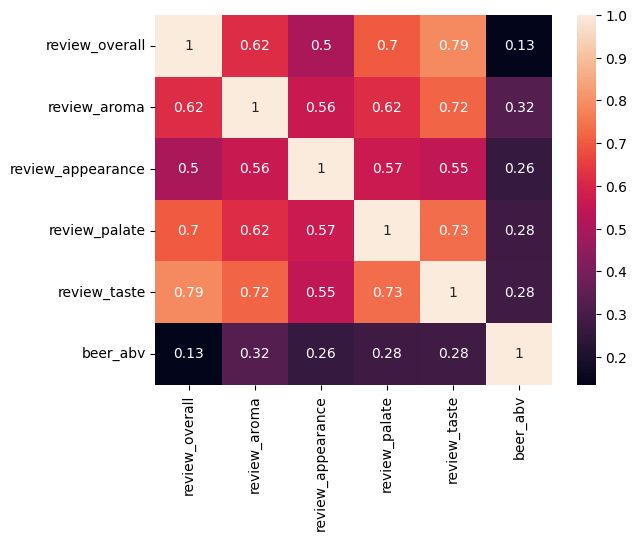

In [ ]:
sns.heatmap(df[['review_overall','review_aroma','review_appearance','review_palate','review_taste','beer_abv']].corr(),annot=True)

**4) I enjoy a beer which aroma and appearance matches the beer style. What beer should I buy ?**

In [ ]:
df_grouped_2 = df.groupby(['beer_style']).agg({'review_aroma':['mean'],'review_appearance':['mean','count']}).reset_index()

In [ ]:
df_grouped_2 = df_grouped_2.transpose().reset_index(drop=True).transpose()

In [ ]:
df_grouped_2 = df_grouped_2.rename(columns={0:'beer_style',
                                            1:'aroma_mean',
                                            2:'appearance_mean',
                                            3:'reviews_count'})

-> Checking which type of beer has the highest average rate on aroma and appearance:

In [ ]:
df_grouped_2.sort_values(by=['aroma_mean','appearance_mean'], ascending=False).head(5)

,beer_style,aroma_mean,appearance_mean,reviews_count
11,American Double / Imperial Stout,4.160665,4.163633,50705
41,Eisbock,4.156778,3.964514,2663
86,Quadrupel (Quad),4.132533,4.117964,18086
20,American Wild Ale,4.126756,4.005451,17794
75,Lambic - Unblended,4.118043,3.912478,1114


In [ ]:
fig = px.scatter(df_grouped_2,x='aroma_mean', y='appearance_mean',color='beer_style')
fig.show()

-> Checking which beer of American Double / Imperial Stout style has the highest average rating in review_overall (and has more than 100 reviews):

In [ ]:
df_filtered.query('beer_style=="American Double / Imperial Stout"').head(3)

review_overall  \
                                                                      count   
beer_style                       beer_name                                    
American Double / Imperial Stout Founders CBS Imperial Stout            637   
                                 Rare Bourbon County Stout              249   
                                 The Abyss                             1412   

                                                                        
                                                                  mean  
beer_style                       beer_name                              
American Double / Imperial Stout Founders CBS Imperial Stout  4.591052  
                                 Rare Bourbon County Stout    4.544177  
                                 The Abyss                    4.450779

**4) I enjoy a beer which aroma and appearance matches the beer style. What beer should I buy ?**

You should buy **Founders CBS Imperial Stout** -> it has the highest average review_overall within the American Double / Imperial Stout style and this style shows the highest average rate on aroma and appearance features.